In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
def plot_series(time, series, format='-', start=0, end=None, label=None):
    plt.plot(time[start:end], series[start:end], format, label=label)
    plt.xlabel("Time")
    plt.ylabel("Value")
    if label:
        plt.legend(fontsize=14)
    plt.grid(True)
    
def trend(time, slope=0):
    return slope * time

def seasonal_pattern(season_time):
    return np.where(season_time < 0.4, np.cos(season_time * 2 * np.pi),
                   1 / np.exp(3 * season_time))

def seasonality(time, period, amplitude=1, phase=0):
    season_time = ((time + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)

def white_noise(time, noise_level = 1, seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level

Making the data

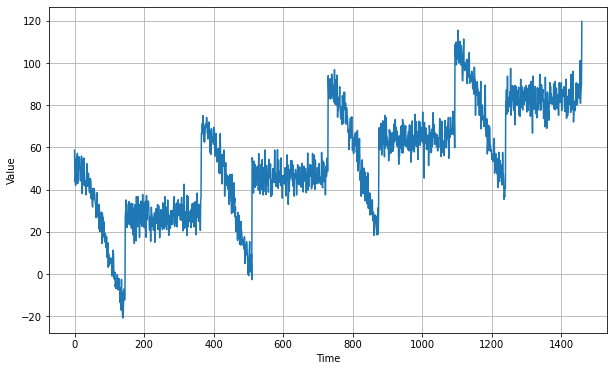

In [4]:
slope = 0.05
baseline = 10
amplitude = 40
noise_level = 5

time = np.arange(4 * 365 + 1, dtype="float32")

series = baseline + trend(time, slope) + seasonality(time, period=365,
            amplitude = amplitude) + white_noise(time, noise_level)
plt.figure(figsize=(10,6))
plot_series(time, series)
plt.show()

Splitting into train/test sets

In [5]:
split_time = 1000
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

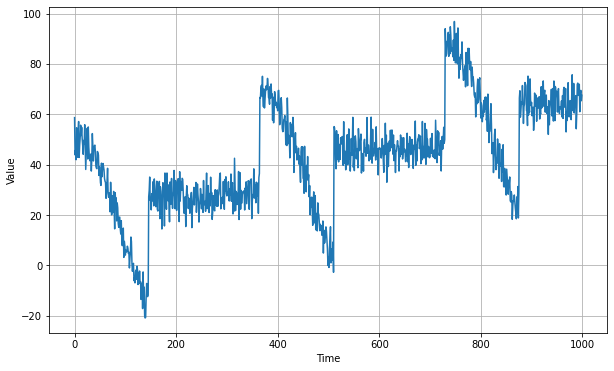

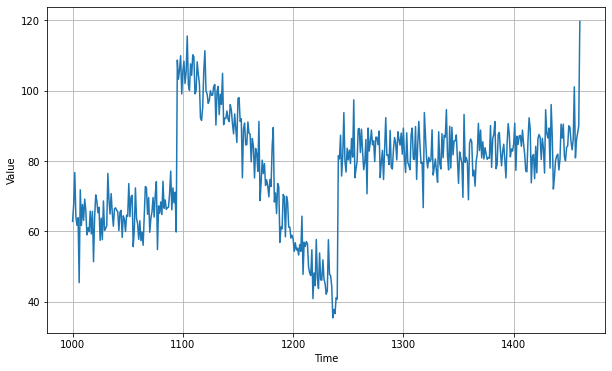

In [6]:
plt.figure(figsize=(10,6))
plot_series(time_train, x_train)
plt.show()

plt.figure(figsize=(10,6))
plot_series(time_valid, x_valid)
plt.show()

In [38]:
naive_forecast = series[split_time-1:-1]

In [39]:
naive_forecast.shape

(461,)

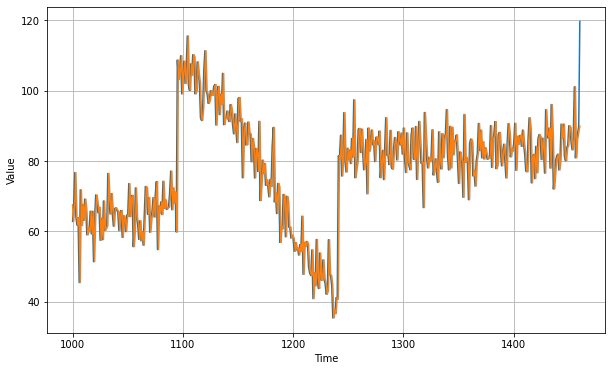

In [40]:
plt.figure(figsize=(10,6))
plot_series(time_valid, x_valid)
plot_series(time_valid, naive_forecast)

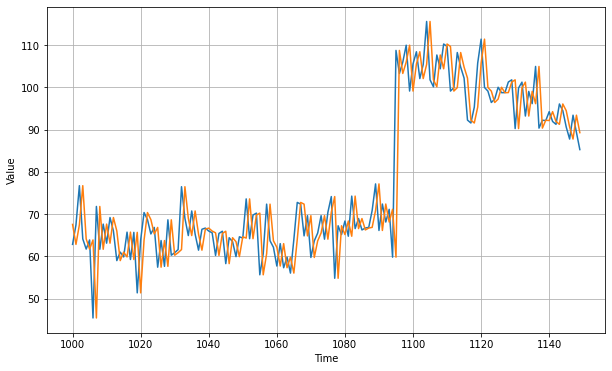

In [48]:
plt.figure(figsize=(10,6))
plot_series(time_valid, x_valid, start =0, end = 150)
plot_series(time_valid, naive_forecast, start=0, end = 150)

In [42]:
print(tf.keras.metrics.mean_squared_error(x_valid, naive_forecast).numpy())
print(tf.keras.metrics.mean_absolute_error(x_valid, naive_forecast).numpy())

66.51631113140347
6.028158142086591


In [68]:
def moving_average_forecast(series, window_size):
    predictions = []
    for i in range(len(series) - window_size+1):
        predictions.append(series[i: i+window_size].mean())
    return np.array(predictions)

In [70]:
window = 30
moving_averages = moving_average_forecast(series, window)[split_time-window:-1]
print(moving_averages.shape)

(461,)


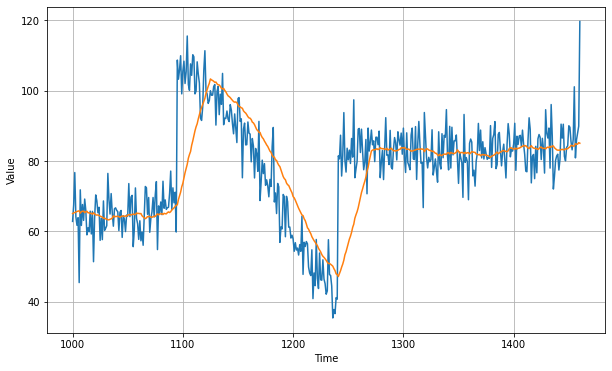

In [71]:
plt.figure(figsize=(10,6))
plot_series(time_valid, x_valid)
plot_series(time_valid, moving_averages)

In [73]:
print(tf.keras.metrics.mean_squared_error(x_valid, moving_averages).numpy())
print(tf.keras.metrics.mean_absolute_error(x_valid, moving_averages).numpy())

109.76091660270491
7.3057782143512995


In [81]:
sesonality_period = 365
diff_series = series[sesonality_period:] - series[:-sesonality_period]
diff_time = time[sesonality_period:]

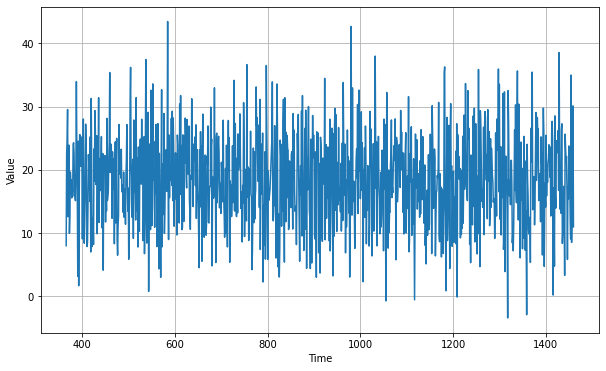

In [82]:
plt.figure(figsize=(10,6))
plot_series(diff_time, diff_series)
plt.show()

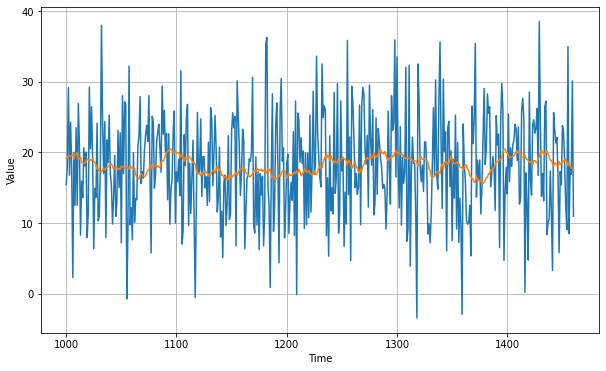

In [86]:
window = 30
diff_moving_averages = moving_average_forecast(diff_series, window)[split_time-window-365:-1]

plt.figure(figsize=(10,6))
plot_series(time_valid, diff_series[split_time-365:])
plot_series(time_valid, diff_moving_averages)

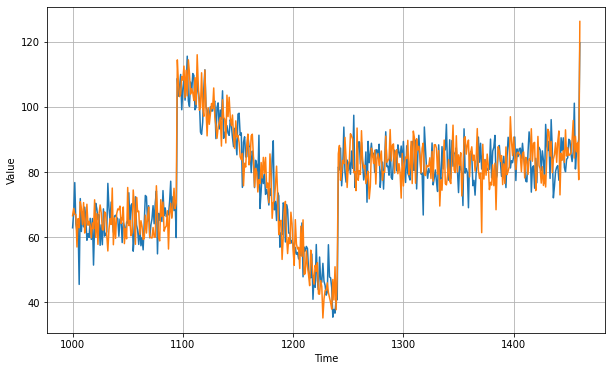

In [88]:
diff_moving_avg_plus_past = series[split_time - 365: - 365] + diff_moving_averages
plt.figure(figsize=(10,6))
plot_series(time_valid, x_valid)
plot_series(time_valid, diff_moving_avg_plus_past)

In [89]:
print(tf.keras.metrics.mean_squared_error(x_valid, diff_moving_avg_plus_past).numpy())
print(tf.keras.metrics.mean_absolute_error(x_valid, diff_moving_avg_plus_past).numpy())

57.451855152650595
6.122943092981937


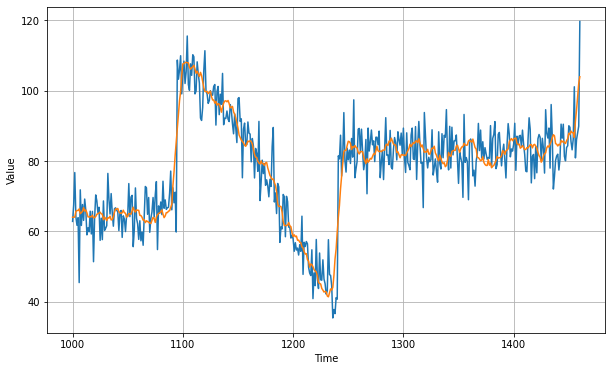

In [93]:
diff_moving_avg_plus_past_smooth = moving_average_forecast(series[split_time - 370: - 361], 10) + diff_moving_averages
plt.figure(figsize=(10,6))
plot_series(time_valid, x_valid)
plot_series(time_valid, diff_moving_avg_plus_past_smooth)

In [94]:
print(tf.keras.metrics.mean_squared_error(x_valid, diff_moving_avg_plus_past_smooth).numpy())
print(tf.keras.metrics.mean_absolute_error(x_valid, diff_moving_avg_plus_past_smooth).numpy())

39.945897697049226
4.911954211177616
